In [59]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

# Lomb-Scargle Periodorgram:
from astropy.timeseries import LombScargle, BoxLeastSquares

# FITS load
from astropy.io import fits
from astropy import units as u 

In [42]:
cepheid_data = np.loadtxt('OGLE-SMC-CEP-0001.dat', delimiter=' ', usecols=range(3))
#cepheid_data[:,0]

In [43]:
time_data=[]
for t in cepheid_data[:,0]:
    time_data.append(t)
len(time_data)
mag_data=[]
for m in cepheid_data[:,1]:
    mag_data.append(m)
err_data=[]
for e in cepheid_data[:,2]:
    err_data.append(e)

#len(mag )
#mag

(17.6, 16.9)

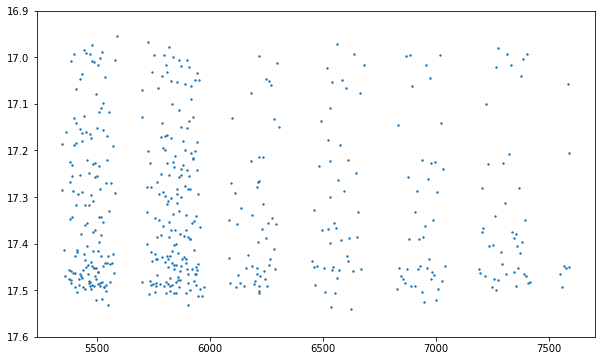

In [50]:
plt.figure(figsize=[10,6])
plt.scatter(time_data, mag_data, s=2)
plt.ylim(17.6,16.9)

In [5]:
assumed_period= 1.1282643502771255
phase=np.remainder(time_data, assumed_period)/assumed_period

(17.6, 16.9)

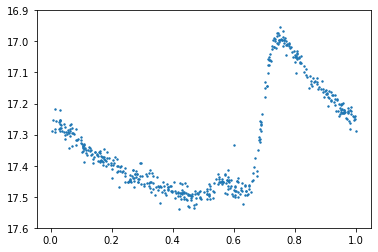

In [6]:
plt.scatter(phase,mag_data,s=2)
plt.ylim(17.6,16.9)

In [7]:
frequency, power = LombScargle(time_data, mag_data, err_data).autopower(minimum_frequency=0.0001, maximum_frequency=10, samples_per_peak=20)
# This is it, for the most part. You can also add the error in mag_data as an additional argument.

Text(0, 0.5, 'Power')

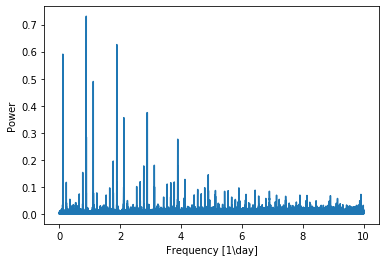

In [8]:
plt.figure()
plt.plot(frequency, power)
plt.xlabel('Frequency [1\day]')
plt.ylabel('Power')

In [9]:
index=np.argmax(power)
#index
period= 1/frequency[index]
#period
phase_new=np.remainder(time_data, period)/period

<ErrorbarContainer object of 3 artists>

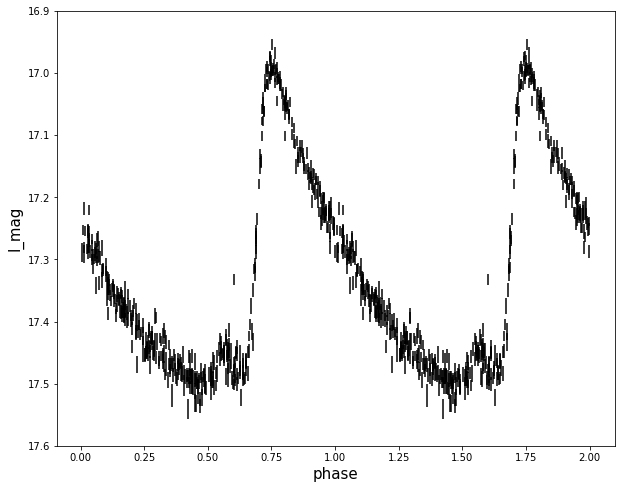

In [10]:
plt.figure(figsize=[10,8])
plt.ylim(17.6,16.9)
plt.xlabel('phase',fontsize=15)
plt.ylabel('I_mag',fontsize=15)
plt.errorbar(np.append(phase_new, phase_new+1), np.append(mag_data, mag_data), np.append(err_data, err_data), color='k', ls='')

In [11]:
Id, Mode, RA, Dec, I_mag,Period,e_Period= np.loadtxt("SMC_Cepheids.txt", dtype='str',unpack=True)
#Period
Period=np.asfarray(Period,float)
I_mag=np.asfarray(I_mag,float)
Period
len(I_mag)

2477

In [12]:
ind= np.where(I_mag!=-99.99)

In [13]:
Per=[]
for i in ind:
    Per.append(Period[i])
I=[]
for i in ind:
    I.append(I_mag[i])
    

In [14]:
P=[]
for p in Per:
    P.append(np.log(Per))
#per
#I_mag

Text(0, 0.5, '$I_{mag}$')

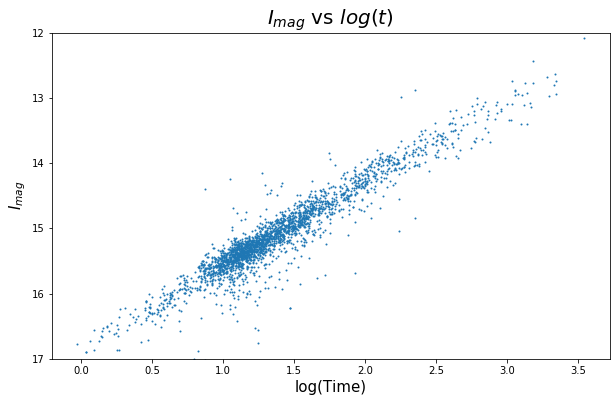

In [15]:
plt.figure(figsize=[10,6])
plt.scatter(P, I, s=1)
plt.title('$I_{mag}$ vs $log(t)$', fontsize=20)
plt.ylim(17,12)
plt.xlabel('log(Time)', fontsize=15)
plt.ylabel('$I_{mag}$', fontsize=15)

In [73]:
data=fits.getdata('kplr010666592-2009131110544_slc.fits')
#time,SAP_flux= data[:,0], data[:,3]
time=data['time']
SAP_flux=data['SAP_flux']

In [74]:
SAP_flux

array([1027045.06, 1027184.44, 1027076.25, ..., 1025451.56, 1025468.5 ,
       1025930.9 ], dtype=float32)

In [75]:
indices= np.where(np.logical_not(np.isnan(SAP_flux)))

In [76]:
time = time[np.logical_not(np.isnan(SAP_flux))]
Flux = SAP_flux[np.logical_not(np.isnan(SAP_flux))]

In [77]:
#plt.figure(figsize=[10,6])
#plt.scatter(time, SAP_flux, s=1, color='k')
#plt.xlabel('time',fontsize=15)
#plt.ylabel('SAP_flux',fontsize=15)

In [78]:
from astropy.timeseries import BoxLeastSquares

In [80]:
model = BoxLeastSquares(time ,Flux)#, dy=0.01)
periodogram = model.autopower(0.2)
periodogram
#plt.plot(periodogram.period, periodogram.power) 

          depth: array([ 107.67232547,  181.35317717,  179.86374907, ..., 2042.31941569,
       2045.67364221, 2038.80486171])
      depth_err: array([0.01675952, 0.01675982, 0.01675956, ..., 0.0425357 , 0.04260662,
       0.04257111])
      depth_snr: array([ 6424.54818921, 10820.71423402, 10732.00937448, ...,
       48014.2473289 , 48013.04943312, 47891.74808063])
       duration: array([0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2])
 log_likelihood: array([4.16432402e+07, 1.18350976e+08, 1.16237029e+08, ...,
       1.20126776e+09, 1.20103205e+09, 1.19505851e+09])
      objective: 'likelihood'
         period: array([0.4       , 0.40033857, 0.40067771, ..., 4.75579216, 4.80409697,
       4.85339313])
          power: array([4.16432402e+07, 1.18350976e+08, 1.16237029e+08, ...,
       1.20126776e+09, 1.20103205e+09, 1.19505851e+09])
   transit_time: array([0.1089391 , 0.06669219, 0.36494975, ..., 4.65413522, 3.46651473,
       2.21411078])

Text(0, 0.5, 'power')

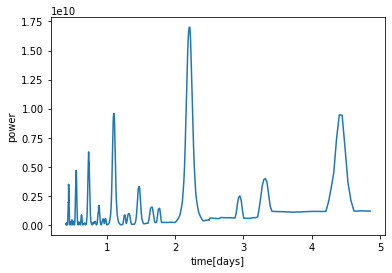

In [81]:
plt.plot(periodogram.period, periodogram.power) 
plt.xlabel('time[days]')
plt.ylabel('power')

In [91]:
#max_power = np.argmax(periodogram.power)
exo_period=periodogram.period[np.argmax(periodogram.power)]
phase=np.remainder(time+exo_period/2, exo_period)/exo_period
exo_period
#np.argmax(periodogram.power)

2.2055172439293367

In [92]:
len(phase)

14242

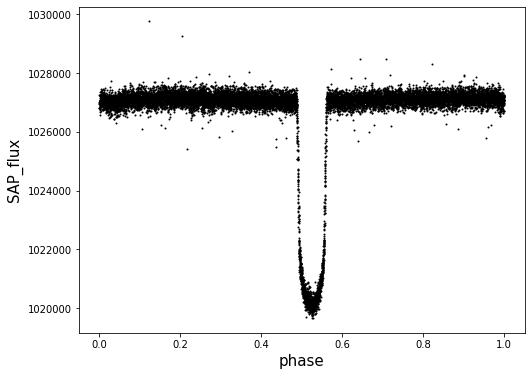

In [93]:
plt.figure(figsize=[8,6])
#plt.ylim()
plt.xlabel('phase',fontsize=15)
plt.ylabel('SAP_flux',fontsize=15)
plt.scatter(phase, Flux, s=1, color='k')

In [26]:
hdu = fits.open('AS1A02_005T01_9000000948_06884cztM0_level2_common_clean.evt')


In [94]:
times = np.concatenate((hdu[1].data['Time'], hdu[2].data['Time'],
                        hdu[3].data['Time'], hdu[4].data['Time']))

In [96]:
len(times)

1907044

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  app.launch_new_instance()


Text(0, 0.5, '$counts\\ s^{-1}$')

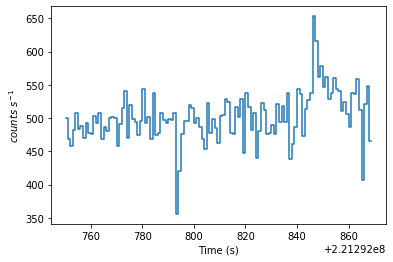

In [107]:
# Define bins. You can change this up and see how the light curve changes
binsize = 1
# # Use this option to see the entire light curve for an orbit of the Satellite. 
# # The detectors are switched off above certain regions of the Earth, known as the South-Atlantic Anomaly
#tbins = np.arange(times.min(), times.max(), binsize)

# Use this data to see only some data containing the GRB. 
# These times are essentially number of seconds since Midnight, Jan 1, 2010.
tbins = np.arange(221292750.0, 221292870.0, binsize)

# Bin the time data
counts, bins = np.histogram(times, bins=tbins)
bins = (bins[1:] + bins[:-1])/2

# Plot the light curve
plt.plot(bins, counts/binsize, ls='steps-mid')
plt.xlabel('Time (s)')
plt.ylabel('$counts\ s^{-1}$')

In [105]:
times.min()

221288272.00029776

In [106]:
times.max()

221295246.999863

In [117]:
GRB_data= np.loadtxt('GCN25560.txt', unpack=True,skiprows=1)
GRB_data[2]

array([16.93, 17.21, 18.  , 18.08])

In [122]:
time=GRB_data[1]
mag=GRB_data[2]

In [143]:
from scipy.optimize import curve_fit as cs

In [144]:
def line(x,m,c):
    return m*x+ c

In [145]:
p_opt, p_err= cs(line, np.log10(time), -mag/2.5)

In [147]:
p_opt

array([-1.61995275, -4.0058591 ])

In [ ]:
~matplotlib.markers

Text(0.5, 1.0, 'Power law decline slope is -1.6200')

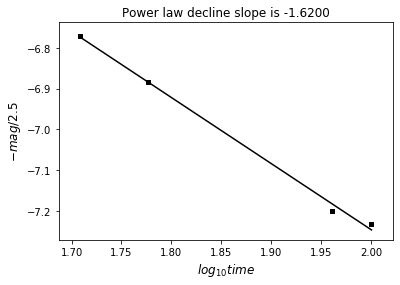

In [165]:
plt.scatter(np.log10(time), -mag/2.5, s=20, marker='s', color='k')
plt.plot(np.log10(time), line(np.log10(time), *p_opt), color='k')
plt.ylabel('$-mag/2.5$', fontsize=12)
plt.xlabel('$log_{10}time$', fontsize=12)
plt.title(f'Power law decline slope is {p_opt[0]: 2.4f}')
#plt.gca().invert_yaxis()

In [173]:
print('END OF ASSIGNMENT 12')
print('*'*120)
print('*'*120)
print('*'*120)
print('*'*120)

END OF ASSIGNMENT 12
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************


In [31]:
import numpy as np
from astropy.time import Time

In [32]:
Time.FORMATS

OrderedDict([('jd', astropy.time.formats.TimeJD),
             ('mjd', astropy.time.formats.TimeMJD),
             ('decimalyear', astropy.time.formats.TimeDecimalYear),
             ('unix', astropy.time.formats.TimeUnix),
             ('cxcsec', astropy.time.formats.TimeCxcSec),
             ('gps', astropy.time.formats.TimeGPS),
             ('plot_date', astropy.time.formats.TimePlotDate),
             ('stardate', astropy.time.formats.TimeStardate),
             ('datetime', astropy.time.formats.TimeDatetime),
             ('ymdhms', astropy.time.formats.TimeYMDHMS),
             ('iso', astropy.time.formats.TimeISO),
             ('isot', astropy.time.formats.TimeISOT),
             ('yday', astropy.time.formats.TimeYearDayTime),
             ('datetime64', astropy.time.formats.TimeDatetime64),
             ('fits', astropy.time.formats.TimeFITS),
             ('byear', astropy.time.formats.TimeBesselianEpoch),
             ('jyear', astropy.time.formats.TimeJulianEpoch),
       

In [33]:
example_time = Time("2018-09-15 23:27:07")


In [34]:
print(f"ISO: {example_time}")
print(f"ISOT: {example_time.isot}")
print(f"Julian Day (JD): {example_time.jd}")
print(f"MJD: {example_time.mjd}")

ISO: 2018-09-15 23:27:07.000
ISOT: 2018-09-15T23:27:07.000
Julian Day (JD): 2458377.477164352
MJD: 58376.977164351854


In [35]:
time1 = Time("2018-09-15 00:00:00", scale='utc')
time2 = Time("2020-01-17 00:00:00", scale='utc')

In [36]:
delta_time = time2-time1
delta_time.jd

489.0

In [37]:
Time.SCALES


('tai', 'tcb', 'tcg', 'tdb', 'tt', 'ut1', 'utc', 'local')

In [38]:
time_array = np.array([time1, time2])
print(time_array)


[<Time object: scale='utc' format='iso' value=2018-09-15 00:00:00.000>
 <Time object: scale='utc' format='iso' value=2020-01-17 00:00:00.000>]


In [39]:
# Time comparisons are supported
time_array.max()

<Time object: scale='utc' format='iso' value=2020-01-17 00:00:00.000>

In [40]:
import astropy.units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [41]:
coordinate1 = SkyCoord(ra = '12h34m10s', dec = '+19d10m29s')
coordinate2 = SkyCoord(ra = 245.88, dec = -19.24, unit='deg')
coordinate3 = SkyCoord(ra = 182.3*u.deg, dec = 54.89*u.deg)

In [42]:
coordinate1.separation(coordinate2)


<Angle 68.0971875 deg>

In [43]:
andromeda_coordinates = SkyCoord.from_name("M31")
andromeda_coordinates

<SkyCoord (ICRS): (ra, dec) in deg
    (10.68470833, 41.26875)>

In [22]:
((42/60)+(44/3600))*360/24

10.683333333333332

In [23]:
63*0.95

59.849999999999994

In [44]:
Sun_data= np.loadtxt('Sun.txt', unpack=True, dtype='str', )
(Sun_data[5,2])

OSError: Sun.txt not found.

In [49]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun

In [50]:
RA=[]
for i in range(len(Sun_data[5,])):
    RA.append((np.float(Sun_data[5,i])+(np.float(Sun_data[6,i])/60)+np.float(Sun_data[7,i])/3600)/24*360)
#(RA)    

NameError: name 'Sun_data' is not defined

In [51]:
IAO = EarthLocation(lat=32.7908*u.deg, lon=79.0002*u.deg, height=4500*u.m)
#utcoffset = -4*u.hour  # Eastern Daylight Time
#time = Time('2012-7-12 00:00:00') #- utcoffset
IAO

<EarthLocation (1024789.66393724, 5272184.03557867, 3436914.84767361) m>

In [69]:
Sunaltaz = get_sun.transform_to(AltAz(obstime=time,location=bear_mountain))
print("M33's Altitude = {0.alt:.2}".format(Sunaltaz))

AttributeError: 'function' object has no attribute 'transform_to'

In [68]:

get_sun(noon).transform_to(AltAz(obstime=times_Jan19_to_Jan20, location=IAO))

<SkyCoord (AltAz: obstime=['2179-02-16 00:00:00.000' '2179-02-16 23:28:21.099'
 '2179-02-17 22:56:42.198' '2179-02-18 22:25:03.297'
 '2179-02-19 21:53:24.396' '2179-02-20 21:21:45.495'
 '2179-02-21 20:50:06.593' '2179-02-22 20:18:27.692'
 '2179-02-23 19:46:48.791' '2179-02-24 19:15:09.890'
 '2179-02-25 18:43:30.989' '2179-02-26 18:11:52.088'
 '2179-02-27 17:40:13.187' '2179-02-28 17:08:34.286'
 '2179-03-01 16:36:55.385' '2179-03-02 16:05:16.484'
 '2179-03-03 15:33:37.582' '2179-03-04 15:01:58.681'
 '2179-03-05 14:30:19.780' '2179-03-06 13:58:40.879'
 '2179-03-07 13:27:01.978' '2179-03-08 12:55:23.077'
 '2179-03-09 12:23:44.176' '2179-03-10 11:52:05.275'
 '2179-03-11 11:20:26.374' '2179-03-12 10:48:47.473'
 '2179-03-13 10:17:08.571' '2179-03-14 09:45:29.670'
 '2179-03-15 09:13:50.769' '2179-03-16 08:42:11.868'
 '2179-03-17 08:10:32.967' '2179-03-18 07:38:54.066'
 '2179-03-19 07:07:15.165' '2179-03-20 06:35:36.264'
 '2179-03-21 06:03:57.363' '2179-03-22 05:32:18.462'
 '2179-03-23 05:00:3

In [54]:
get_sun?

In [55]:
noon=Time('2011-01-01 12:00:00')
noon.mjd
delta = np.arange(noon.mjd, noon.mjd+356, 1)*u.day
#noonseries= noon.mjd + delta
noontime= Time(delta, format= 'mjd')
coordinates= get_sun(noon).transform_to(AltAz(obstime=noon+delta, location=IAO))

In [56]:
noon.mjd
noon=Time('2019-01-01 12:00:00')
delta = np.linspace(noon.mjd, noon.mjd+356, 365)*u.day
times_Jan19_to_Jan20 = noon + delta
frame_Jan19_to_Jan20 = AltAz(obstime=times_Jan19_to_Jan20, location=loc)
sunaltazs_Jan19_to_Jan20 = get_sun(noon).transform_to(frame_Jan19_to_Jan20)

NameError: name 'loc' is not defined

In [57]:
azimuth= coordinates.az
altitude= coordinates.alt
#azimuth

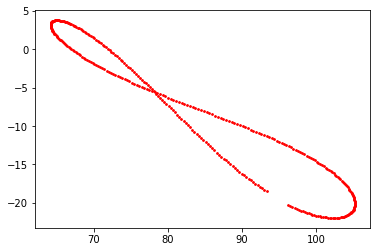

In [67]:
#plt.figure(figsize=(12,10))
plt.scatter(azimuth, altitude, s=3, color ='r')

In [304]:
loc = EarthLocation(lat=32.7908*u.deg, lon=79.0002*u.deg, height=4500*u.m)
midnight=Time('2011-01-01 18:00:00')
midnight.mjd
delta_moon= np.arange(midnight.mjd, midnight.mjd+29.5, 1+(51/1440))*u.day
#delta_moon = np.arange(midnight.mjd, midnight.mjd+365, 1)*u.day
#noonseries= noon.mjd + delta
midtime= Time(delta_moon, format= 'mjd')
coordinates_moon= get_moon(midnight).transform_to(AltAz(obstime=midnight+delta_moon, location=loc))

In [305]:
azimuth_moon= coordinates_moon.az
altitude_moon= coordinates_moon.alt
#azimuth

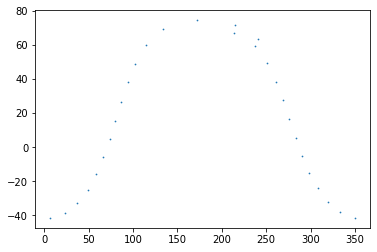

In [306]:
plt.scatter(azimuth_moon,altitude_moon, s=0.5)

In [309]:
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body_barycentric, get_body, get_moon
t = Time("2014-09-22 23:22")
loc = EarthLocation.of_site('greenwich')
with solar_system_ephemeris.set('builtin'):
    mer = get_body('mercury', t, loc)
mer    

<SkyCoord (GCRS: obstime=2014-09-22 23:22:00.000, obsgeoloc=(3949481.6923192, -550931.90668394, 4961151.73597576) m, obsgeovel=(40.15954082, 287.47876681, -0.04597885) m / s): (ra, dec, distance) in (deg, deg, AU)
    (202.9474434, -12.66180922, 0.95870407)>

In [361]:
t.mjd
delta_mercury=np.arange(t.mjd, t.mjd+88, 1)*u.day
random_time= Time(delta_mercury, format='mjd')
coordinates_mercury= mer.transform_to(AltAz(obstime=t.mjd+ random_time, location=loc))

In [362]:
mercury_azimuth= coordinates_mercury.az
mercury_altitude= coordinates_mercury.alt

In [363]:
#RA=[]
#for i in random_time:
#    RA.append(get_body('mercury',i,loc).ra)
#mer.ra
#DEC=[]
#for i in random_time:
#    DEC.append(get_body('mercury',i,loc).dec)


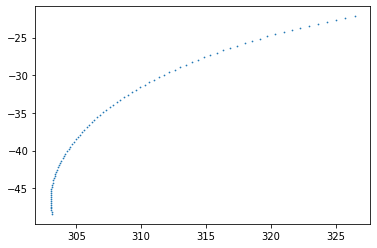

In [364]:
plt.scatter(mercury_azimuth,mercury_altitude, s=0.5)

In [366]:
print('END OF ASSIGNMENT 13')
print('*'*120)
print('*'*120)
print('*'*120)
print('*'*120)

END OF ASSIGNMENT 13
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************


In [1]:
#Import the required packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [368]:
def my_derivative(t, y, a, b, c): 
    #t is the independent variable,y is the dependent variable, a and b are parameters. The order matters.
    return a*y + b*(t**2) + c

In [369]:
t_span = (0, 5)


In [370]:
t = np.linspace(0,5,100)


In [371]:
y0 = np.array([1])


In [372]:
a = 1
b = -2
c = 2

In [373]:
sol = solve_ivp(my_derivative,t_span, y0, t_eval = t, args = (a,b,c))
#note that t_eval and args are keyword arguments

In [375]:
#sol

In [39]:
#uncomment below to see the solution array
#print(sol.y)
#print(sol.y.shape)

In [380]:
solution = sol.y[0] #Why?
time_points = sol.t
#print(solution)
#print(time_points)

In [35]:
#plt.figure(figsize = (10,6))
#plt.plot(time_points, solution)
#plt.xlabel('t')
#plt.ylabel('y')
#plt.title('Solution')
#plt.show()

In [381]:
def shm_derivative(t, state, gamma, eps):
    #time is the independent variable, state is the dependent variable
    x = state[0]
    y = state[1]
    return [y, -2*gamma*y - eps*x] #We return the list of derivatives of each individual ODE

In [383]:
t_span = (0,10) #t0 and tf
t = np.linspace(0,10,1000) #evaluation time points
init_state = [1,0] #The initial state of the system
#Setting the parameter values
#Note that eps > gamma^2, thus this deontes underdamped oscillations
gamma = 0.5
eps = 2

In [386]:
sol = solve_ivp(shm_derivative, t_span, init_state, t_eval = t, args = (gamma, eps))
#obtain the solution from sol object
state = sol.y
print(state.shape)
#Uncomment below to see the solution

(2, 1000)


In [387]:
#access x
x_underdamped = state[0]
#access y (the velocity)
y_underdamped = state[1]

In [37]:
#Lets plot the solution
#plt.figure(figsize = (10,6))
#plt.plot(t, x_underdamped)
#plt.xlabel('Time')
#plt.ylabel('Displacement')
#plt.title('Underdamped Oscillations')
#plt.show()

In [38]:
#plt.figure(figsize = (10,6))
#plt.plot(t, y_underdamped)
#plt.xlabel('Time')
#plt.ylabel('Velocity')
#plt.title('Underdamped Oscillations')
#plt.show()

In [390]:
solve_ivp?

In [6]:
#Import the required packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [7]:
def Lane_Emden(eps, state_LE,n):
    theta=state_LE[0]
    phi=state_LE[1]
    return (phi, -2*phi/eps -theta**n)

In [17]:
def polytrope(index):
    eps_span=(0.001,10)
    eps_eval= np.linspace(0.001,5,1000)
    initial_state=[1,0]
    solve_eqn=solve_ivp(Lane_Emden, eps_span, initial_state, t_eval = eps_eval, args=[index])
    theta=solve_eqn.y[0]
    plt.plot(eps_eval, theta, label=n)
    plt.legend()

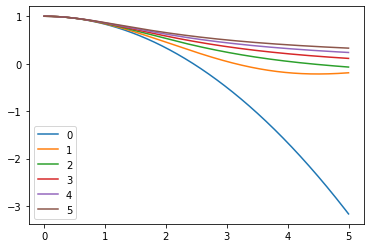

In [18]:
for n in [0,1,2,3,4,5]:
    polytrope(n)

In [31]:
def LE(LE_epsilon, LE_state):
    LE_theta=LE_state[0]
    LE_phi=LE_state[1]
    return(LE_phi, (-2/LE_epsilon)*LE_phi -LE_theta**1)

(-3, 1)

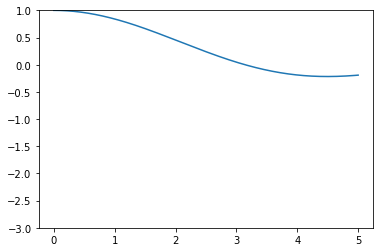

In [32]:
LE_epsilon_span=(0.001, 10)
LE_epsilon_evaluate= np.linspace(0.001, 5, 1000)
LE_initial_state=[1,0]
LE_solve = solve_ivp(LE, LE_epsilon_span, LE_initial_state, t_eval = LE_epsilon_evaluate)
LE_state=LE_solve.y
LE_theta=LE_state[0]
LE_phi=LE_state[1]
plt.plot(LE_epsilon_evaluate, LE_theta)
plt.ylim(-3,1)

In [33]:
print('END OF ASSIGNMENT 14')
print('*'*120)
print('*'*120)
print('*'*120)
print('*'*120)

END OF ASSIGNMENT 14
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************
